In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
df = pd.read_csv("C:\\Users\\adity\Downloads\\heart.csv")

X = df.drop("target", axis=1)
y = df["target"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN Model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

c:\Users\adity\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

# Predict
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

# Evaluation
accuracy = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6788 - loss: 0.6134 - val_accuracy: 0.7755 - val_loss: 0.5640
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7668 - loss: 0.5491 - val_accuracy: 0.7755 - val_loss: 0.5224
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8031 - loss: 0.5047 - val_accuracy: 0.7755 - val_loss: 0.4881
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8238 - loss: 0.4660 - val_accuracy: 0.7755 - val_loss: 0.4600
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8446 - loss: 0.4355 - val_accuracy: 0.7551 - val_loss: 0.4379
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8446 - loss: 0.4111 - val_accuracy: 0.7551 - val_loss: 0.4203
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8446 - loss: 0.3907 - val_accuracy: 0.7755 - val_loss: 0.4076
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8601 - loss: 0.3761 - val_accuracy: 0.7755 - val_loss

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)
history = model.fit(
    X_train, 
    y_train, 
    epochs=20, 
    batch_size=16, 
    validation_split=0.2
)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9948 - loss: 0.0248 - val_accuracy: 0.8163 - val_loss: 0.6563
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0245 - val_accuracy: 0.8163 - val_loss: 0.6539
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9948 - loss: 0.0242 - val_accuracy: 0.8163 - val_loss: 0.6901
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0238 - val_accuracy: 0.8163 - val_loss: 0.6925
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0234 - val_accuracy: 0.8163 - val_loss: 0.6939
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0228 - val_accuracy: 0.8163 - val_loss: 0.6950
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0224 - val_accuracy: 0.8163 - val_loss: 0.6973
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0223 - val_accuracy: 0.8163 - val_loss

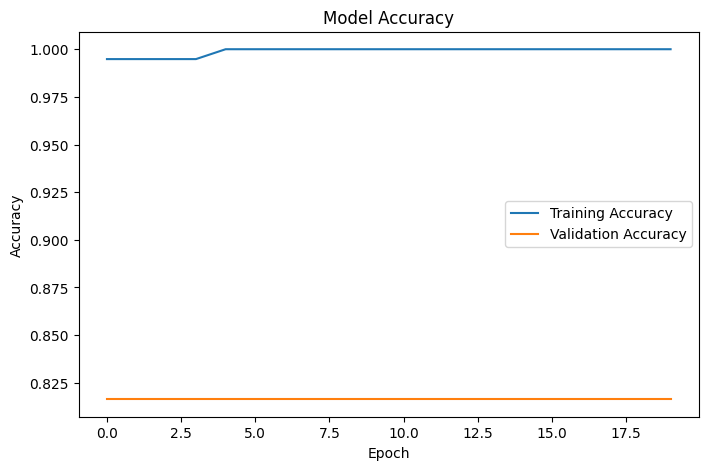

In [21]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

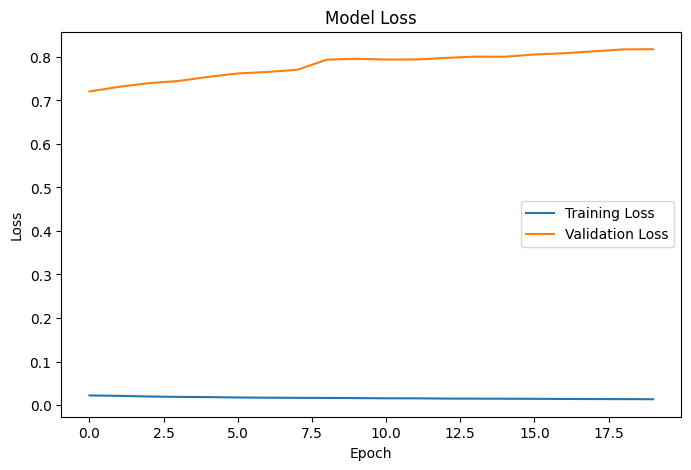

In [22]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 0.8360655737704918
Confusion Matrix:
 [[26  3]
 [ 7 25]]


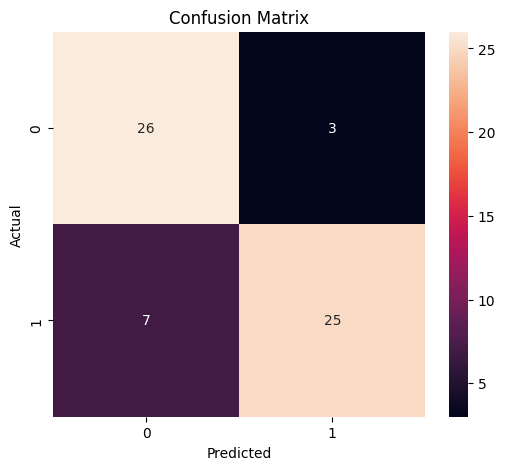

In [ ]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)
accuracy = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()